In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [14]:
# 데이터 로드
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# 타겟 추가
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# 타겟값 치환
df.target = df.target.map({0:"setosa", 1:"versicolor",
                           2:"virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
# 타겟 분류 확인
df.target.value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: >

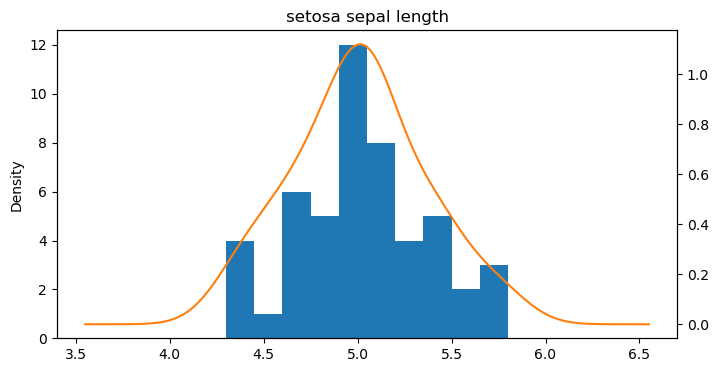

In [17]:
# 분꽃 품종별 데이터 분리
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]

# setosa의 꽃받침 길이 분포 확인
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde',
                                ax=ax,
                                secondary_y=True,
                                title = "setosa sepal length",
                                figsize = (8,4))

가우시안 나이브베이즈 분류
    * 특징들의 값들이 정규 분포(가우시안 분포)되어 있다는 가정 하에 조건부 확률을 계산

<Axes: >

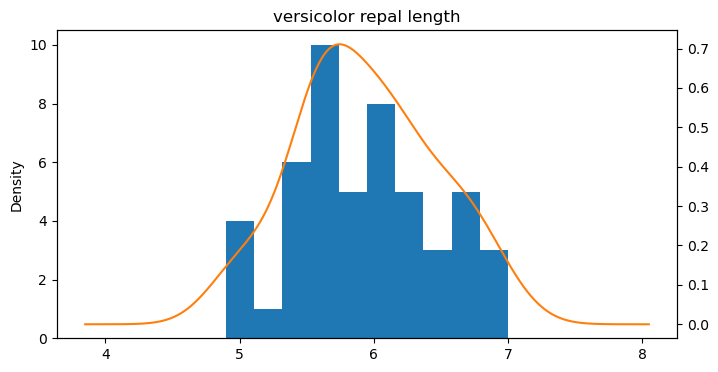

In [18]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde',
                                        ax=ax,
                                        secondary_y=True,
                                        title="versicolor repal length",
                                        figsize = (8,4))

In [19]:
# 데이터 분리
X_train,X_test,y_train,y_test=train_test_split(dataset.data,
                                               dataset.target,
                                               test_size=0.2)

In [22]:
# 모델 생성
model = GaussianNB()
model.fit(X_train, y_train)

# 예측 및 결과 확인
target = y_test
predicted = model.predict(X_test)

print(metrics.classification_report(y_test, predicted))
print('-'*20)
print(accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        12
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

--------------------
0.9666666666666667


In [23]:
# Confusion Marix 확인
print(metrics.confusion_matrix(target, predicted))

[[12  0  0]
 [ 0 11  1]
 [ 0  0  6]]
